In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/CSE All-Share Historical Data Latest.csv')

In [ ]:
df["Price"] = df["Price"].str.replace(",", "").astype(float)

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,07/14/2023,10595.02,"10,491.52","10,625.81","10,480.69",2.71B,0.99%
1,07/13/2023,10491.52,"10,489.98","10,543.06","10,479.65",172.44M,0.01%
2,07/12/2023,10489.98,"10,315.81","10,510.55","10,306.25",150.21M,1.52%
3,07/11/2023,10333.20,"10,311.25","10,335.88","10,263.46",131.54M,0.21%
4,07/10/2023,10311.25,"10,301.96","10,345.87","10,266.37",103.23M,0.02%


In [ ]:
# revese the order of the DataFrame
df = df.iloc[::-1]
# only keep daily close
df = df[['Date', 'Price']]
# change the index to Date
df.set_index('Date', inplace=True)
# calculate daily returns and add to the DataFrame
df['return'] = df['Price'].pct_change()
# remove the first row, as it is nan
df.dropna(inplace=True)
df.head(10)

,Price,return
Date,,
07/22/2019,5659.77,-0.009688
07/23/2019,5683.47,0.004187
07/24/2019,5745.97,0.010997
07/25/2019,5794.66,0.008474
07/26/2019,5872.89,0.013500
07/29/2019,5995.20,0.020826
07/30/2019,5951.75,-0.007247
07/31/2019,5935.34,-0.002757
08/01/2019,5897.26,-0.006416


<Axes: title={'center': 'CSE index price since 2019'}, xlabel='Date'>

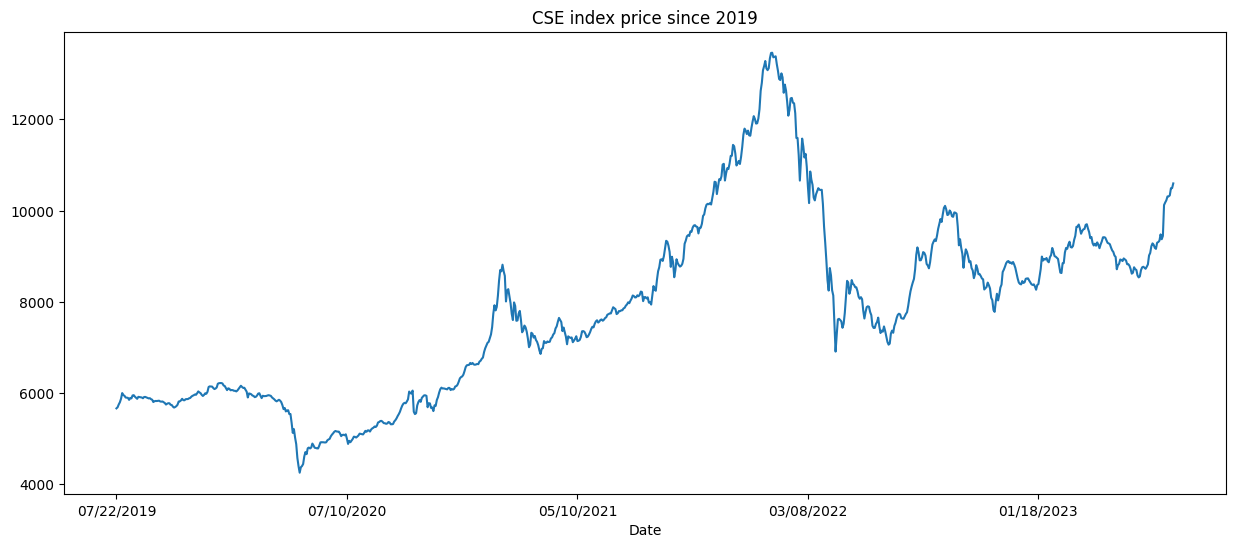

In [ ]:
df['Price'].plot(figsize=(15,6), title="CSE index price since 2019")

In [ ]:
import datetime as datetime
import calendar

In [ ]:
# Convert the index to datetime
df.index = pd.to_datetime(df.index)

# Determine the weekday and add it as a new column to the DataFrame
df['Weekday'] = df.index.weekday
df['Weekday'] = df['Weekday'].apply(lambda x: calendar.day_name[x])

# Determine the month and add it as a new column to the DataFrame
df['Month'] = df.index.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

# Determine the year, convert it to string, and add it as a new column to the DataFrame
df['Year'] = df.index.year.astype(str)

df.head(10)

,Price,return,Weekday,Month,Year
Date,,,,,
2019-07-22,5659.77,-0.009688,Monday,July,2019
2019-07-23,5683.47,0.004187,Tuesday,July,2019
2019-07-24,5745.97,0.010997,Wednesday,July,2019
2019-07-25,5794.66,0.008474,Thursday,July,2019
2019-07-26,5872.89,0.013500,Friday,July,2019
2019-07-29,5995.20,0.020826,Monday,July,2019
2019-07-30,5951.75,-0.007247,Tuesday,July,2019
2019-07-31,5935.34,-0.002757,Wednesday,July,2019
2019-08-01,5897.26,-0.006416,Thursday,August,2019


#Weekdays

In [ ]:
#Are stock returns the same for each weekday?

#Asumption:

#We use daily close, so the stock returns will be the return from the close the day before until the close the next day
#Some weekdays have more trading days than others, but simply averaging takes care of this
#Although the years don't have the same returns, we don't normalize the data in this analysis



# Mean return for each weekday
df_weekday_mean = df.groupby('Weekday').mean()
# Reorder
df_weekday_mean = df_weekday_mean.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
df_weekday_mean

#Thursday has the highest returns

,Price,return
Weekday,,
Monday,7832.848389,-0.000149
Tuesday,7839.730160,-0.001926
Wednesday,7847.500815,0.001937
Thursday,7801.774378,0.002372
Friday,7845.102762,0.001734


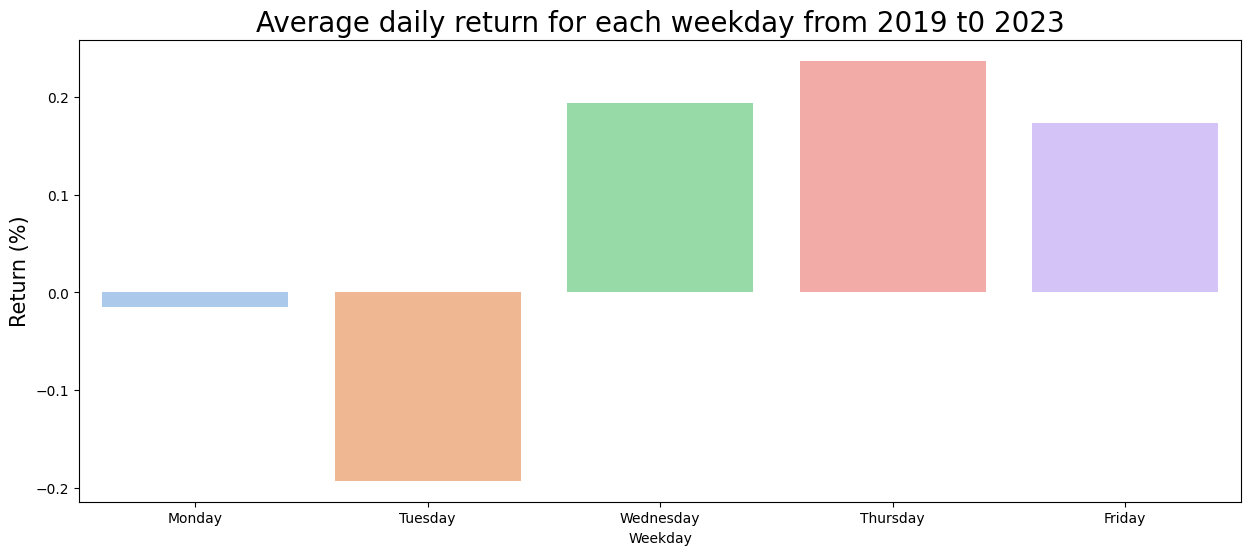

In [ ]:
x = df['Weekday']
y = 100*df_weekday_mean['return']

# reorder
df_weekday_mean = df_weekday_mean.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
df_weekday_mean

# barplot of the average return for each week day
import seaborn as sns
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=df_weekday_mean.index, y=y, data=df_weekday_mean)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Average daily return for each weekday from 2019 t0 2023", size=20)
plt.savefig('df.png')
plt.show()


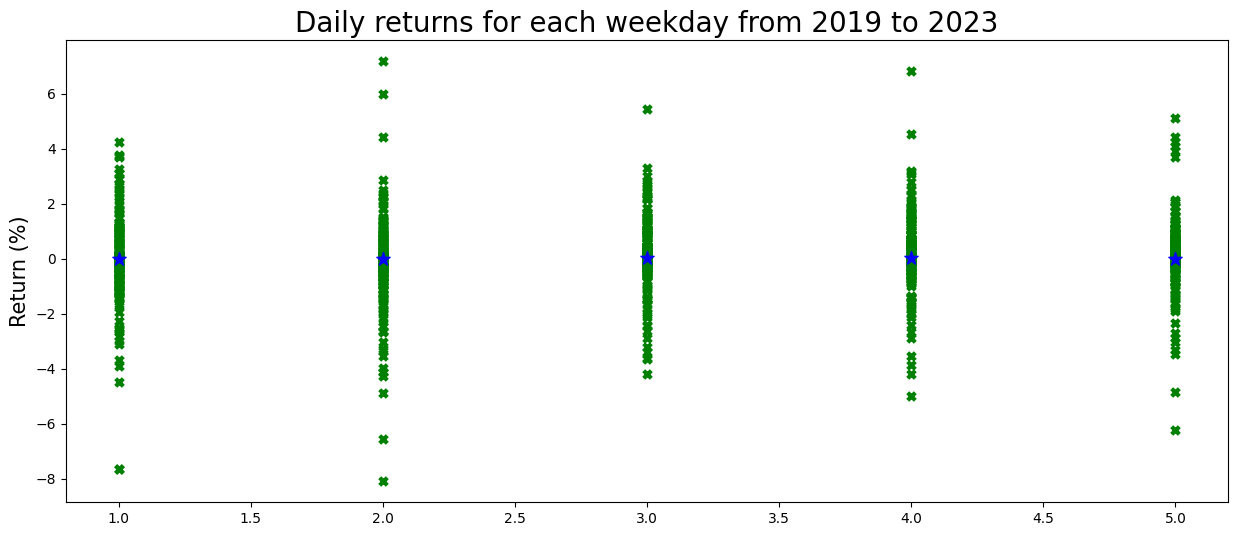

In [ ]:
# Scatter plot of all observations to see the variations for each weekday
x = df['Weekday'].values
y = 100*df['return'].values
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
points = [[x[i], y[i]] for i in range(0,len(x))]
for i in range(0,len(points)):
    points[i][0] = days.index(points[i][0])+1

x = [points[i][0] for i in range(0,len(points))]
y = [points[i][1] for i in range(0,len(points))]

fig = plt.figure(figsize=(15,6))
ax = plt.scatter(x, y, color="green", linewidths=3, marker="x", s=30)
ax = plt.scatter([1,2,3,4,5], df_weekday_mean["return"], color="blue", marker="*", s=100)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Daily returns for each weekday from 2019 to 2023", size=20)
plt.savefig('df2.png')
plt.show()

In [ ]:
# Volatility of the returns for each weekday
df['return'] = df['return']
weekday_vol = df[['Weekday', 'return']].groupby('Weekday').std()
print(weekday_vol)
print()
# Number of weekdays
print(df[['Weekday', 'return']].groupby('Weekday').count())

             return
Weekday            
Friday     0.013633
Monday     0.016412
Thursday   0.013855
Tuesday    0.016868
Wednesday  0.013171

           return
Weekday          
Friday        181
Monday        180
Thursday      185
Tuesday       188
Wednesday     184


##Statistical significance

In [ ]:
#Now we want to test whether or not the average return for each weekday is statistically significantly different from the average return over all the months using a t-test.
#Let μᵢ be the mean of all returns with weekday i. Define the null hypothesis to be that μᵢ is the same as the grand mean, i.e the average daily return over all days:

#For i from Monday to Friday:
#H₀: μᵢ = Grand mean
#H₁: μᵢ ≠ Grand mean

In [ ]:
# Perform statistical analysis
from scipy import stats
average_return = df_weekday_mean['return'].mean()
for day in df_weekday_mean.index.values:
 sample = np.array(df[df.Weekday == day]['return'])
 print(day,':', stats.ttest_1samp(sample, average_return))

#lowest P-value is Tuesday, since <0.05, we reject the null hypothesis

Monday : TtestResult(statistic=-0.7704013794888889, pvalue=0.44207743755278606, df=179)
Tuesday : TtestResult(statistic=-2.2107720878146524, pvalue=0.028264221233168536, df=187)
Wednesday : TtestResult(statistic=1.177563774073288, pvalue=0.2404997301692732, df=183)
Thursday : TtestResult(statistic=1.5491918001438367, pvalue=0.12305388274198208, df=184)
Friday : TtestResult(statistic=0.92836321012303, pvalue=0.354462418847461, df=180)


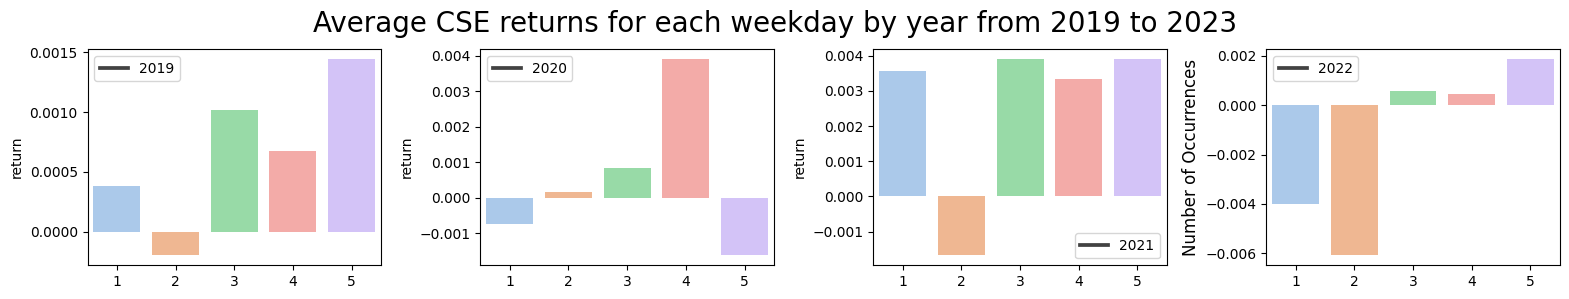

In [ ]:
years = range(2019, 2023)
nr_rows = 1
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

axis = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        axis.append(axs[r][c])


count = 0
for year in years:
    df_year = df[str(year)]
    # Mean return for each weekday
    df_year = df_year.groupby('Weekday').mean()
    # reorder
    df_year = df_year.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    # plot
    sns.barplot(x=[1,2,3,4,5], y='return', data=df_year, ax=axis[count])
    plt.ylabel('Number of Occurrences', fontsize=12)
    axis[count].legend([str(years[count])])
    count = count + 1

fig.suptitle("Average CSE returns for each weekday by year from 2019 to 2023", size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.85)
plt.savefig('df3.png')
plt.show()

#Friday best performing on years 2019,2021 and 2023, while Thursday consistently had positive returns

#Months

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']


# add 1 to the return columm and only keep the relevant columns
df['return'] = df['return'] + 1
df_month = df[['return', 'Month', 'Year']]
# subtract 1 again to get back the return
df['return'] = df['return'] - 1

# group by Month and multiply the returns+1 together for each month, subtracting 1 at the end
df_month = df_month.groupby(['Month', 'Year']).prod()-1
# convert the returns to percentage
df_month['return'] = df_month['return']


df_month.reset_index(inplace=True)
df_month.Month = df_month.Month.astype('category')
df_month.Month.cat.set_categories(months, inplace=True)
df_month.sort_values(['Month'], inplace=True)
df_month

,Month,Year,return
18,January,2023,0.042642
17,January,2022,0.064084
16,January,2021,0.279567
15,January,2020,-0.032541
11,February,2020,-0.056805
14,February,2023,0.036484
13,February,2022,-0.110040
12,February,2021,-0.137485
31,March,2023,0.012256
30,March,2022,-0.230963


In [ ]:
# sort the years as well
df_returns = pd.DataFrame(columns=df_month.columns)
count = 0
for i in range(0,12):
    df_year = df_month[24*i:24*(i+1)]
    df_year.Year = df_year.Year.astype('category')
    df_year.Year.cat.set_categories([str(year) for year in years], inplace=True)
    df_year.sort_values(['Year'], inplace=True)
    df_returns = pd.concat([df_returns, df_year], ignore_index=True)
    count = count + 1

df_returns

,Month,Year,return
0,March,2020,-0.182604
1,May,2020,0.060182
2,February,2020,-0.056805
3,June,2020,0.062477
4,January,2020,-0.032541
5,February,2021,-0.137485
6,March,2021,-0.047491
7,June,2021,0.058665
8,April,2021,0.012206
9,January,2021,0.279567


In [ ]:
# calculate the average monthly return for all months
df_month_returns = df_returns.groupby(['Month']).mean()

# reorder
df_month_returns = df_month_returns.reindex(months)
df_month_returns

,return
Month,
January,0.088438
February,-0.066961
March,-0.112201
April,-0.055228
May,0.025770
June,0.032617
July,0.048929
August,0.078429
September,0.060855


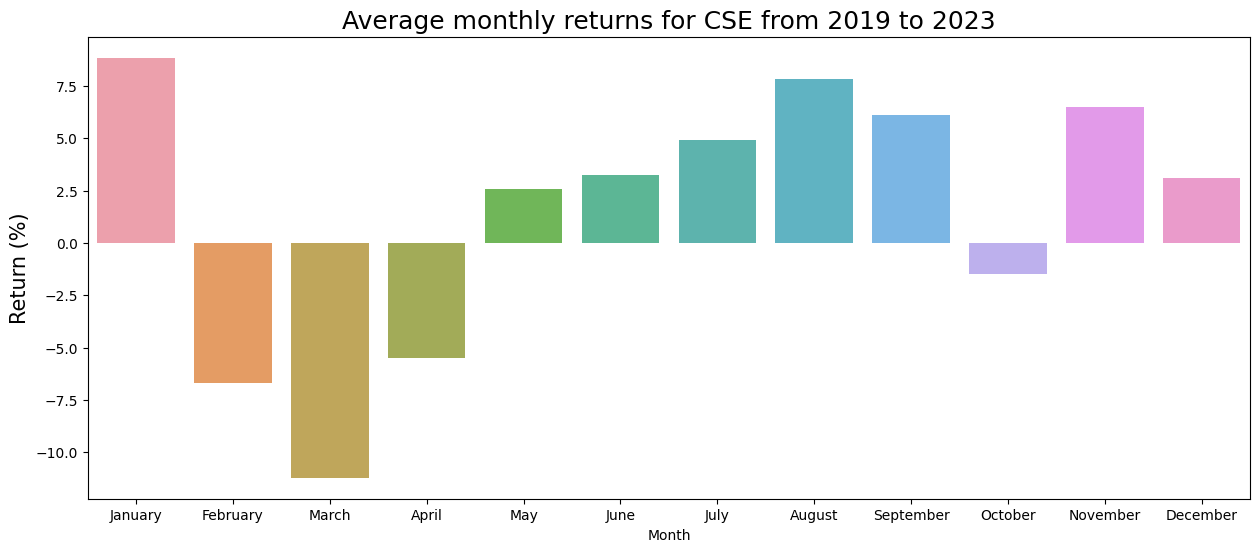

In [ ]:
# plot the barplot of the average monthly returns in percentage
import seaborn as sns
#sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=df_month_returns.index, y=100*df_month_returns['return'], alpha=0.9)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Average monthly returns for CSE from 2019 to 2023", size=18)
plt.savefig('df4.png')
plt.show()

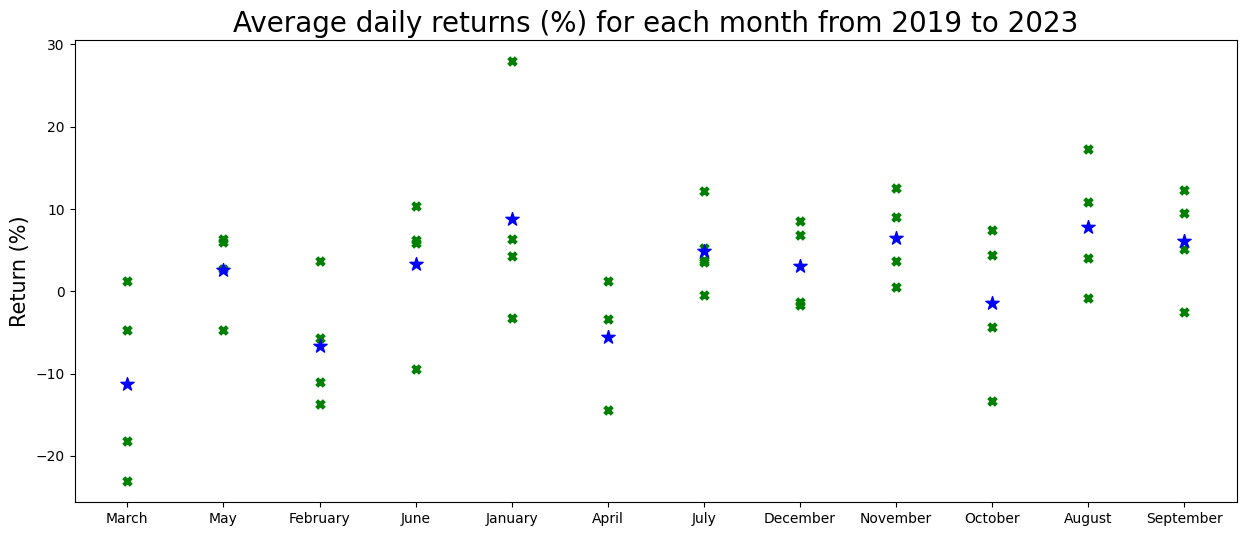

In [ ]:
# scatter plot of the monthly returns in percentage
fig = plt.figure(figsize=(15,6))
ax = plt.scatter(x=df_returns['Month'], y=100*df_returns['return'], color="green", linewidths=3, marker="x", s=30)
ax = plt.scatter(months, 100*df_month_returns, color="blue", marker="*", s=100)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Average daily returns (%) for each month from 2019 to 2023", size=20)
plt.savefig('df5.png')
plt.show()

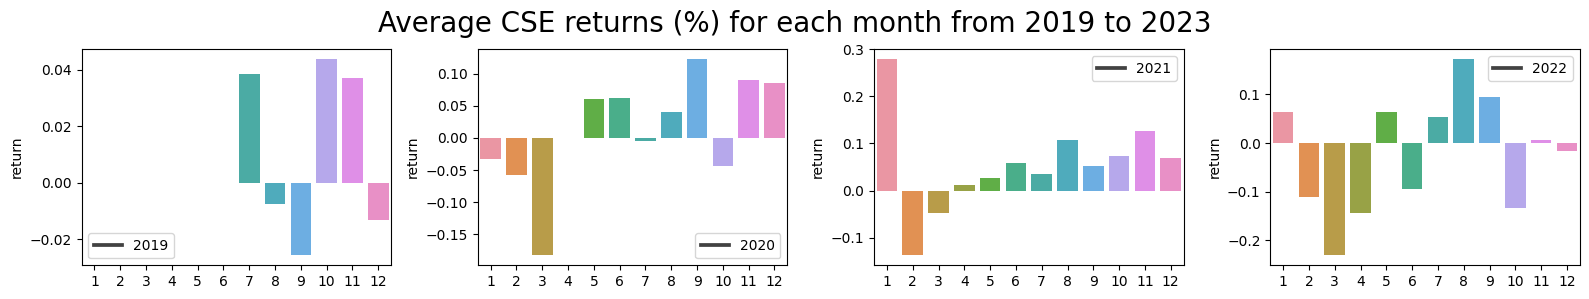

In [ ]:
# Plot of the monthly return for each year from 1996 through 2019 in percentage
years = range(2019, 2023)
nr_rows = 1
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

axis = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        axis.append(axs[r][c])

count = 0
for year in years:
    df_year = df_returns[df_returns.Year == str(year)]
    # Mean return for each weekday
    df_year = df_year.groupby("Month").mean()
    # reorder
    df_year = df_year.reindex(['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December'])
    # plot
    axis[count] = sns.barplot(x=[1,2,3,4,5,6,7,8,9,10,11,12], y='return', data=df_year, ax=axis[count])
    #axis[count].ylabel("Return (%)")
    axis[count].legend([str(years[count])])
    count = count + 1

fig.suptitle("Average CSE returns (%) for each month from 2019 to 2023", size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.85)
plt.savefig('df6.png')
plt.show()

In [ ]:
# average monthly return over all months
average_return = df_month_returns.mean()
average_return[0]

0.015118668588973495

In [ ]:
from scipy import stats

for month in months:
    sample = df_returns[df_returns.Month == month]['return']
    print(month,':', stats.ttest_1samp(sample, average_return))
    print()

#March has the lowest p-value of 0.1108 but not <0.05, so we do not reject H0
#flaw with the monthly return analysis is the lack of samples

January : TtestResult(statistic=1.0944324386045454, pvalue=0.35376747497045247, df=3)

February : TtestResult(statistic=-2.141219575755662, pvalue=0.12171271123129855, df=3)

March : TtestResult(statistic=-2.240875404401085, pvalue=0.11087152388718684, df=3)

April : TtestResult(statistic=-1.521855065466932, pvalue=0.2674615573969807, df=2)

May : TtestResult(statistic=0.41259143023844536, pvalue=0.7076195034255639, df=3)

June : TtestResult(statistic=0.4016412561605727, pvalue=0.7148481940235387, df=3)

July : TtestResult(statistic=1.63727984320314, pvalue=0.17691363680551372, df=4)

August : TtestResult(statistic=1.600720049187657, pvalue=0.2077507265747107, df=3)

September : TtestResult(statistic=1.4113621531900498, pvalue=0.2529713055085883, df=3)

October : TtestResult(statistic=-0.6359189477288606, pvalue=0.5700237757207562, df=3)

November : TtestResult(statistic=1.848821985668469, pvalue=0.16161374715355079, df=3)

December : TtestResult(statistic=0.5842778290439539, pvalue=0.

#Day of month

In [ ]:
# mean return of each day of the month (note that 31 will have a smaller sample size)
day_of_month_return = df[["return"]].groupby(df.index.day).mean()
day_of_month_return.head()

,return
Date,
1,0.000626
2,-0.002043
3,0.002138
4,0.000048
5,0.002179


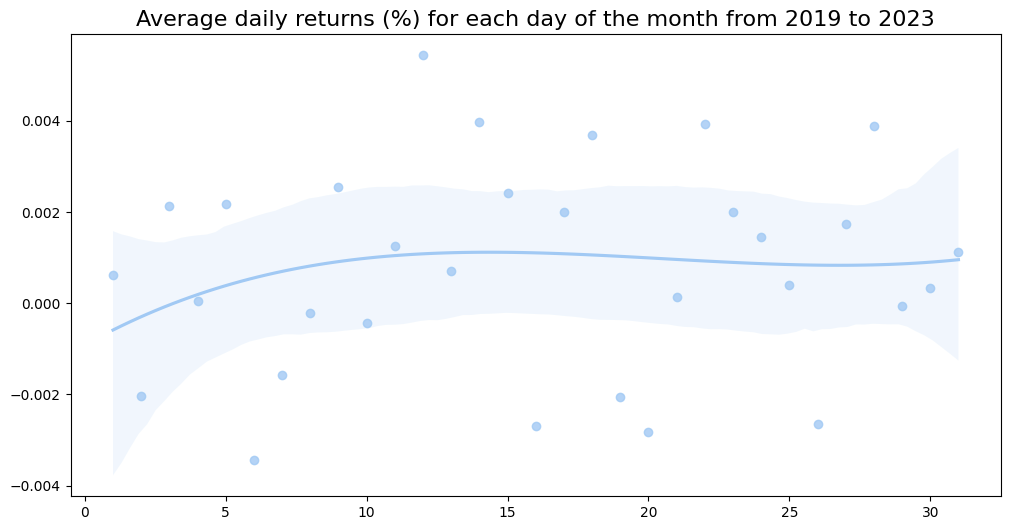

In [ ]:
ax, fig = plt.subplots(figsize=(12, 6))
ax = sns.regplot(x=day_of_month_return.index.values, y=day_of_month_return.values, order=3)
ax = plt.title("Average daily returns (%) for each day of the month from 2019 to 2023", size=16)
plt.savefig('df7.png')
plt.show()

In [ ]:
# group by year
year_return = df[['return']].groupby(df.index.year).mean()
year_return.head()

,return
Date,
2019,0.000650
2020,0.000566
2021,0.002571
2022,-0.001364
2023,0.001785


In [ ]:
day_returns = pd.DataFrame(index=range(1,32))

for year in years:
    day_returns[str(year)] = df[str(year)]['return'].groupby(df[str(year)].index.day).mean()

In [ ]:
# daily average over all days from 1996 through 2019
average_return = day_of_month_return.mean()
average_return[0]

days = range(0,31)
for day in days:
    print(day+1,":", stats.ttest_1samp(day_returns.iloc[day], average_return))
    print()

#1: 0.0658
#27: 0.0289
#28: 0.0401

1 : TtestResult(statistic=-2.836865830791475, pvalue=0.06581619320967533, df=3)

2 : TtestResult(statistic=-1.7552296428748613, pvalue=0.17748689213557325, df=3)

3 : TtestResult(statistic=0.2824705771655804, pvalue=0.79595022736272, df=3)

4 : TtestResult(statistic=-2.0892481048525307, pvalue=0.127868641891073, df=3)

5 : TtestResult(statistic=-0.10417939150197758, pvalue=0.9236012954749246, df=3)

6 : TtestResult(statistic=-1.4539148565618476, pvalue=0.2419419061941672, df=3)

7 : TtestResult(statistic=-0.6621665482622864, pvalue=0.5551881273104554, df=3)

8 : TtestResult(statistic=-0.18829505102114005, pvalue=0.8626624295994901, df=3)

9 : TtestResult(statistic=1.0630010735206699, pvalue=0.36576309338687224, df=3)

10 : TtestResult(statistic=-0.039133490543058265, pvalue=0.9712425533519478, df=3)

11 : TtestResult(statistic=0.16821466767193266, pvalue=0.8771155327725867, df=3)

12 : TtestResult(statistic=0.763752086006038, pvalue=0.5005872290300075, df=3)

13 : TtestResult(statistic

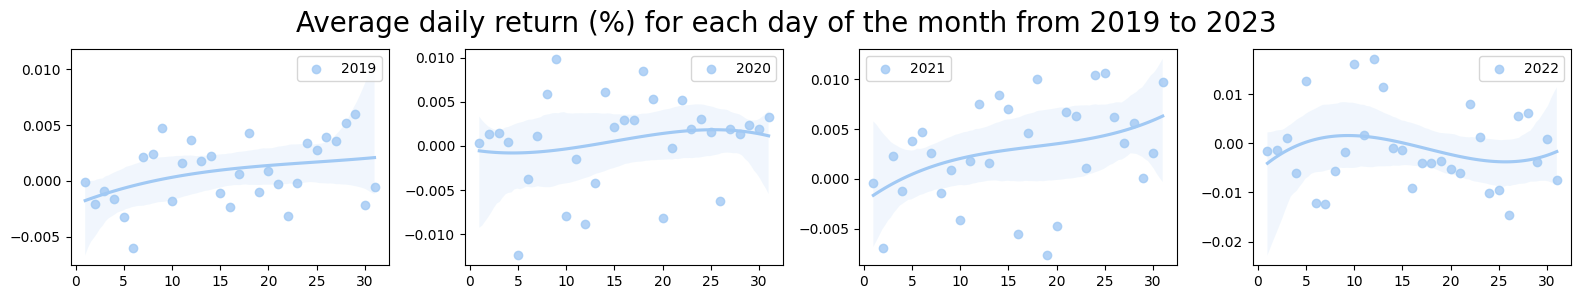

In [ ]:
nr_rows = 1
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

axis = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        axis.append(axs[r][c])

count = 0
for year in years:
    returns = day_returns[str(year)]
    axis[count] = sns.regplot(x=returns.index.values, y=returns.values, ax=axis[count], order=3)
    axis[count].legend([str(years[count])])
    count = count + 1

fig.suptitle("Average daily return (%) for each day of the month from 2019 to 2023", size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.85)
plt.savefig('df8.png')
plt.show()